In [3]:
def affine_direta(f,T,domain=0):
    '''
    Implementação da affine porém utilizando a transformação direta
    '''
    import numpy as np
    
    # Get domain and image dimentions (in that case they are the same)
    domain = f.shape
    H,W = domain
    
    # Create indices vectors
    r,c = np.indices(domain)
    r = r.ravel();
    c = c.ravel();
    
    g = np.zeros(domain)
    
    # Concatenate indeces
    rc1 = np.concatenate([ [r], [c], [np.ones(r.size),] ], axis=0)
    
    # Apply direct transformation
    Mrc = T.dot(rc1) 
    
    # Interpolating indeces and gettin them
    rr = np.rint(Mrc[0,:]).astype(int)
    cc = np.rint(Mrc[1,:]).astype(int)

    # Matrix reduction for 2D-matrix instead of 2D-Array
    if (len(rr.shape)>1):
        rr = np.squeeze(np.asarray(rr))
        cc = np.squeeze(np.asarray(cc))
         
     # Get new indeces within domain
    idx = (rr>=0) & (rr<H) & (cc>=0) & (cc<W)
    
    # Create output Image
    g[rr[idx], cc[idx]] = f[r[idx],c[idx]]
           
    return g

In [4]:
testing = (__name__ == '__main__')

if testing:
    ! jupyter nbconvert --to 'python' affine_direta
    import sys,os
    path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/d191122/Aula_6/')
    print(path)
    if path not in sys.path:
        sys.path.append(path)
    import affine_direta as aff1

[NbConvertApp] Converting notebook affine_direta.ipynb to python
[NbConvertApp] Writing 3310 bytes to affine_direta.py
/etc/jupyterhub/ia898_1s2017/d191122/Aula_6


## Examples

### Example 1

#### Caso numérico

In [5]:
if testing:
    import numpy as np

    f = np.arange(1,26).reshape(5,5)
    T1 = np.array([[1, 0, 1], [0, 1, 2], [0,0,1]])
    T2 = np.array([[1, 0, -1], [0, 1, -1], [0,0,1]])
    angle = np.pi/4
    T3 = np.array([[np.cos(angle), -np.sin(angle), 0], [np.sin(angle), np.cos(angle), 0], [0,0,1]])
     
    g1 = aff1.affine_direta(f,T1)
    g2 = aff1.affine_direta(f,T2)
    g3 = aff1.affine_direta(f,T3)
    
    print("Imagem original:\n",f)
    print("\nTransformação 1 - deslocar uma linha para baixo e duas colunas para a direita:\n",T1)
    print("Resulta 1:\n",g1)

    print("\nTransformação 2 - deslocar uma linha para cima e uma coluna para a esquerda:\n",T2)
    print("Resulta 2:\n",g2)

    print("\nTransformação 3 - rotacionar 45 graus em sentido anti-horário:\n",T3)
    print("Resulta 3:\n",g3)

Imagem original:
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]

Transformação 1 - deslocar uma linha para baixo e duas colunas para a direita:
 [[1 0 1]
 [0 1 2]
 [0 0 1]]
Resulta 1:
 [[  0.   0.   0.   0.   0.]
 [  0.   0.   1.   2.   3.]
 [  0.   0.   6.   7.   8.]
 [  0.   0.  11.  12.  13.]
 [  0.   0.  16.  17.  18.]]

Transformação 2 - deslocar uma linha para cima e uma coluna para a esquerda:
 [[ 1  0 -1]
 [ 0  1 -1]
 [ 0  0  1]]
Resulta 2:
 [[  7.   8.   9.  10.   0.]
 [ 12.  13.  14.  15.   0.]
 [ 17.  18.  19.  20.   0.]
 [ 22.  23.  24.  25.   0.]
 [  0.   0.   0.   0.   0.]]

Transformação 3 - rotacionar 45 graus em sentido anti-horário:
 [[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
Resulta 3:
 [[  1.   7.   0.  13.  19.]
 [  0.  11.  12.  17.  23.]
 [  0.   0.  16.   0.  22.]
 [  0.   0.   0.  21.   0.]
 [  0.   0.   0.   0.   0.]]


### Example 2

#### Teste com imagens

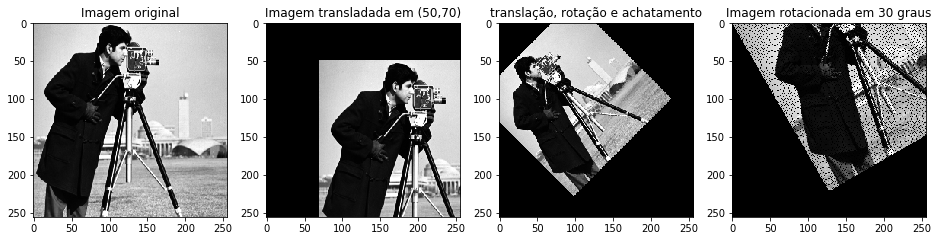

In [8]:
if testing:
    %matplotlib inline
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

    f = mpimg.imread('/home/lotufo/ia898/data/cameraman.tif')
    T1 = np.array([[1, 0, 50], [0, 1, 70], [0,0,1]])
    T2 = np.array([[0.5, -0.5, 100], [0.5, 0.5, -30], [0,0,1]])
    angle = np.pi/6
    T3 = np.array([[np.cos(angle), -np.sin(angle), 0], [np.sin(angle), np.cos(angle), 0], [0,0,1]])

    g1 = aff1.affine_direta(f,T1)
    g2 = aff1.affine_direta(f,T2)
    g3 = aff1.affine_direta(f,T3)

    plt.figure(1,figsize=[16,16])
    plt.subplot(141)
    plt.imshow(f,cmap="gray")
    plt.title('Imagem original')
    plt.subplot(142)
    plt.imshow(g1,cmap="gray")
    plt.title('Imagem transladada em (50,70)')
    plt.subplot(143)
    plt.imshow(g2,cmap="gray")
    plt.title('translação, rotação e achatamento')
    plt.subplot(144)
    plt.imshow(g3,cmap="gray")
    plt.title('Imagem rotacionada em 30 graus')
    